# Especialidad en Estadistica Aplicada
## Data Mining
### Nombre: Mateo Orozco Baldovino
### Fecha: 25 de Enero de 2026
La informacion de este cuaderno puede ser encontrado en el repositorio de GitHub:
https://github.com/TheMaorba/DataMining/tree/main/Tarea5

# Caracteristicas de la base de datos

# Importando librerias y base de datos

In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:

 #Importando la base de datos
df = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")

In [4]:
# Imprimiendo tipos de datos y separando las variables numericas
df.info()
columnas_numericas = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
# Tambien se puede usar columnas_numericas = df.select_dtypes(include=['float64', 'int64'])
# Eliminar columnas no numericas
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,no
1,44,29,5,151,1,-1,0,no
2,33,2,5,76,1,-1,0,no
3,47,1506,5,92,1,-1,0,no
4,33,1,5,198,1,-1,0,no


# PCA (Analisis de componentes principales)

In [6]:
# Estandarizar los datos
datos_escalados = StandardScaler().fit_transform(columnas_numericas)
# Crear un DataFrame con los datos estandarizados
df_estandar = pd.DataFrame(datos_escalados, columns=columnas_numericas.columns)

In [7]:
df_estandar.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


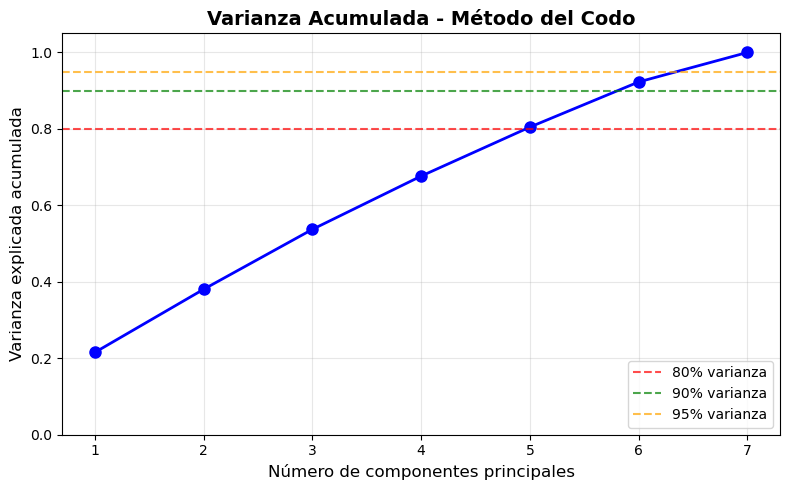

Varianza explicada por componente:
PC1: 0.2156 (21.56%)
PC2: 0.1650 (16.50%)
PC3: 0.1567 (15.67%)
PC4: 0.1393 (13.93%)
PC5: 0.1282 (12.82%)
PC6: 0.1180 (11.80%)
PC7: 0.0772 (7.72%)


In [8]:
# Método del codo para PCA
pca = PCA().fit(datos_escalados)
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Gráfico de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), 
         varianza_acumulada, 
         'bo-', 
         linewidth=2, 
         markersize=8)

# Líneas de referencia
plt.axhline(y=0.80, color='red', linestyle='--', label='80% varianza', alpha=0.7)
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza', alpha=0.7)
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% varianza', alpha=0.7)

plt.xlabel('Número de componentes principales', fontsize=12)
plt.ylabel('Varianza explicada acumulada', fontsize=12)
plt.title('Varianza Acumulada - Método del Codo', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(varianza_acumulada) + 1))
plt.ylim([0, 1.05])
plt.tight_layout()
plt.show()

# Imprimir varianza explicada por componente
print("Varianza explicada por componente:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

Teniendo en cuenta los resultados obtenidos en el metodo del codo nos indica que el numero optimo de componentes es de 7 teniendo en cuenta que con ese numero de componentes se logra explicar el 95% de la varianza de los datos originales.

In [9]:
# Aplicar PCA y crea un Array con los componentes principales seleccionados
pca2 = PCA(n_components=7, random_state=42)
componentes_principales = pca2.fit_transform(datos_escalados)
# Crear un DataFrame con los resultados de PCA
df_pca2 = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7'])
df_pca2.head(5)

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,0.033707,-1.402827,1.025284,-1.075341,-0.778167,0.292582,-0.152987
1,0.017589,-0.954478,-0.356871,-1.208935,-0.259824,0.274863,-0.218753
2,0.022938,-0.699632,-1.071917,-1.197462,0.499407,0.332147,-0.262384
3,0.011669,-0.954774,0.181356,-1.391388,-0.050603,0.248351,-0.206882
4,0.051021,-0.912816,-1.085188,-0.811320,0.363598,0.433987,-0.252515


In [10]:
print(f"Varianza explicada por cada componente: {pca2.explained_variance_}")
print(f"Proporción de varianza explicada por cada componente: {pca2.explained_variance_ratio_}")

Varianza explicada por cada componente: [1.50932686 1.15503984 1.09704035 0.97500185 0.89743459 0.82617914
 0.54013221]
Proporción de varianza explicada por cada componente: [0.21561335 0.16500204 0.15671658 0.1392829  0.12820211 0.11802298
 0.07716004]


Teniendo en cuenta los resultados obtenidos nos indica que la varianza es explicada mayoritariamente por el componente 1, que compone un 21.5% de la varianza total, seguido por el componente 2 con un 16.5% y el componente 3 con un 15.6% de la varianza total. Los demas componentes explican una menor cantidad de varianza, siendo el coomponente 7 el que menos varianza explica con un 7.7% de la varianza total.

In [11]:
# Correlación de los componentes del PCA
cargas = pd.DataFrame(pca2.components_.T, 
                      columns=[f'Componente {i+1}' for i in range(pca2.n_components_)], 
                      index=columnas_numericas.columns)
print("Correlación de los componentes del PCA:")
print(cargas)

Correlación de los componentes del PCA:
          Componente 1  Componente 2  Componente 3  Componente 4  \
age          -0.022080     -0.118235      0.692060     -0.241537   
balance       0.028662     -0.144324      0.693459      0.149560   
day          -0.271250      0.511672      0.127543      0.474770   
duration      0.059299     -0.450100     -0.027532      0.815195   
campaign     -0.254936      0.612232      0.125718      0.123606   
pdays         0.667509      0.207383      0.014288      0.050038   
previous      0.641122      0.288023      0.084455      0.107517   

          Componente 5  Componente 6  Componente 7  
age          -0.658263     -0.116740      0.036145  
balance       0.679498      0.114900      0.013263  
day          -0.005585     -0.649043      0.040669  
duration     -0.286203      0.215049      0.020841  
campaign     -0.136335      0.710324      0.077132  
pdays        -0.018319     -0.031275      0.712322  
previous     -0.064080      0.011367     -0.

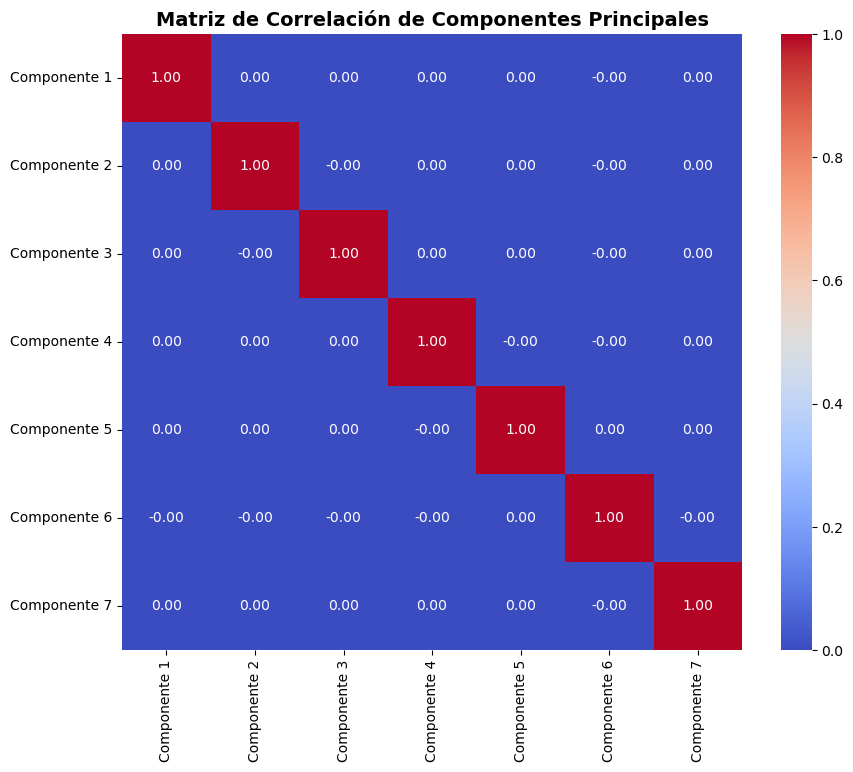

In [12]:
# Matriz de correlación de los componentes principales
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Componentes Principales', fontsize=14, fontweight='bold')
plt.show()

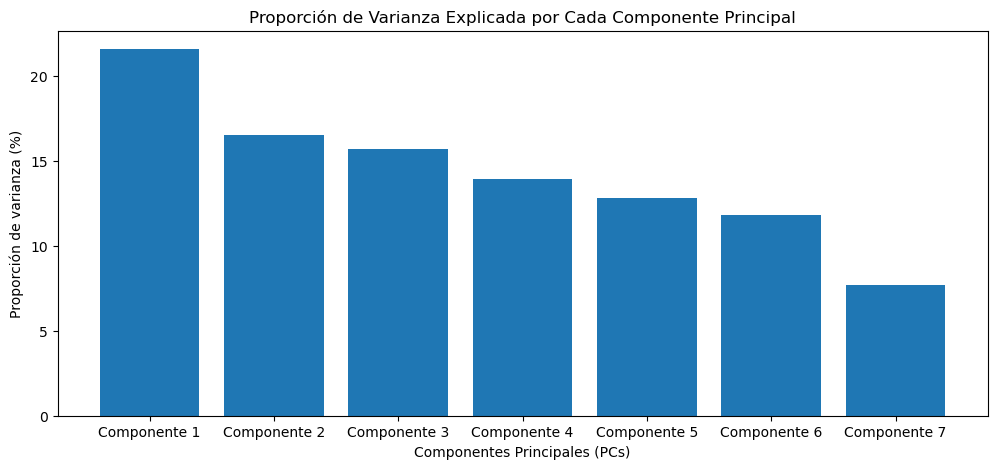

In [13]:
# Grafico de barra de proporcion de varianza explicada por cada componente
plt.figure(figsize=(12,5))
plt.bar(df_pca2.columns, pca2.explained_variance_ratio_ * 100)
plt.ylabel("Proporción de varianza (%)")
plt.xlabel("Componentes Principales (PCs)")
plt.title("Proporción de Varianza Explicada por Cada Componente Principal")
plt.show()


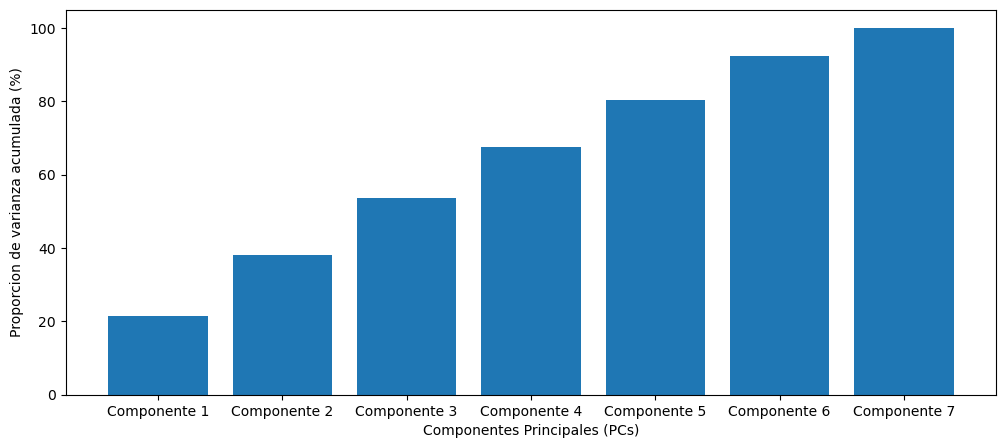

In [14]:
plt.figure(figsize=(12,5))
plt.bar(df_pca2.columns, np.cumsum(pca2.explained_variance_ratio_ * 100))
plt.ylabel("Proporcion de varianza acumulada (%)")
plt.xlabel("Componentes Principales (PCs)")
plt.show()

[1.50932686 1.15503984 1.09704035 0.97500185 0.89743459 0.82617914
 0.54013221]


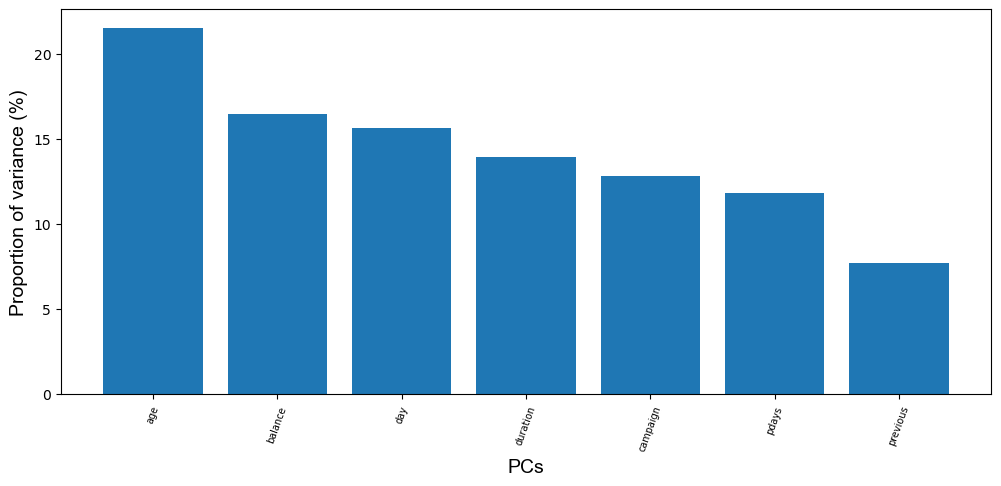

In [15]:
# obtener los valores propios (varianza explicada por cada PC)  
print(pca2.explained_variance_)

# obtener gráfico de sedimentación (para prueba de sedimentación o prueba del codo)
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[df_estandar.columns, pca2.explained_variance_ratio_], show=True, dim=(12,5), axlabelfontsize=14)
plt.show()
# El gráfico de sedimentación se guardará en el mismo directorio con el nombre screeplot.png

d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1805: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(x[i], y[i])
d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1807: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i], y[i], varnames, fontsize=10)


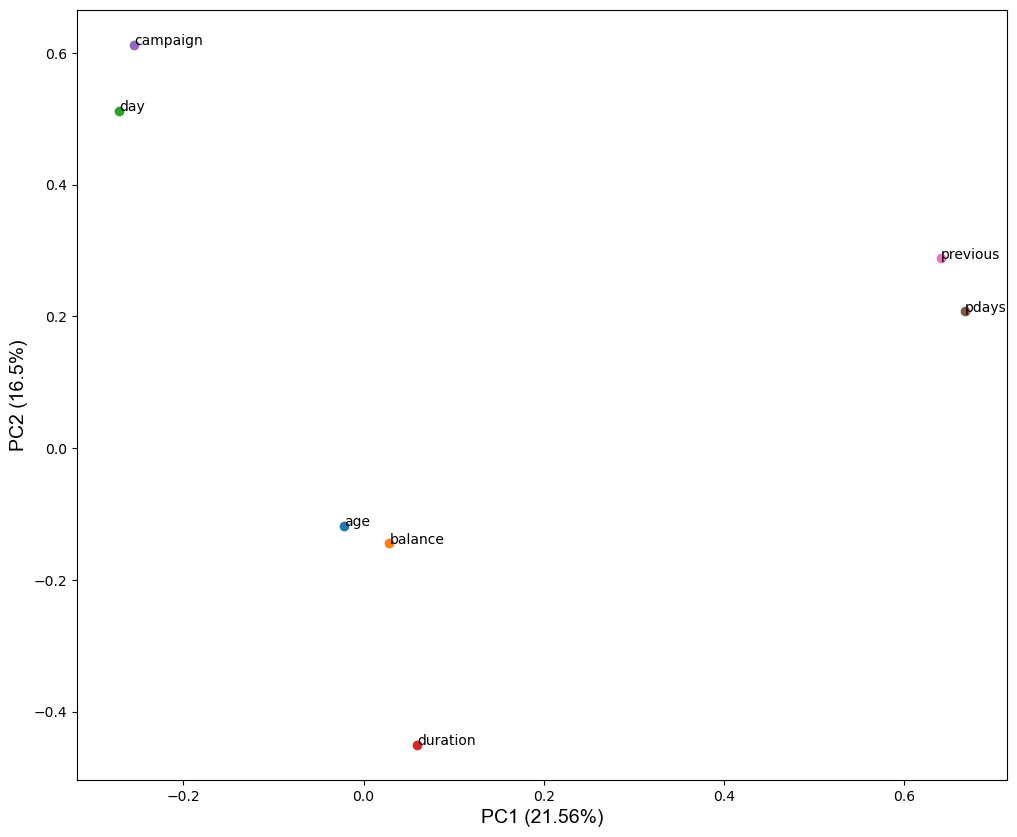

In [16]:
# obtener gráficos de cargas de PCA (2D y 3D)
# 2D
cluster.pcaplot(
    x=cargas['Componente 1'],
    y=cargas['Componente 2'],
    labels=columnas_numericas.columns.values,
    show=True, dim=(12,10), axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2)
)

d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1816: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x[i], y[i], z[i])
d:\Programas\anaconda3\envs\pyconda\Lib\site-packages\bioinfokit\visuz.py:1818: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i], y[i], z[i], varnames, fontsize=10)


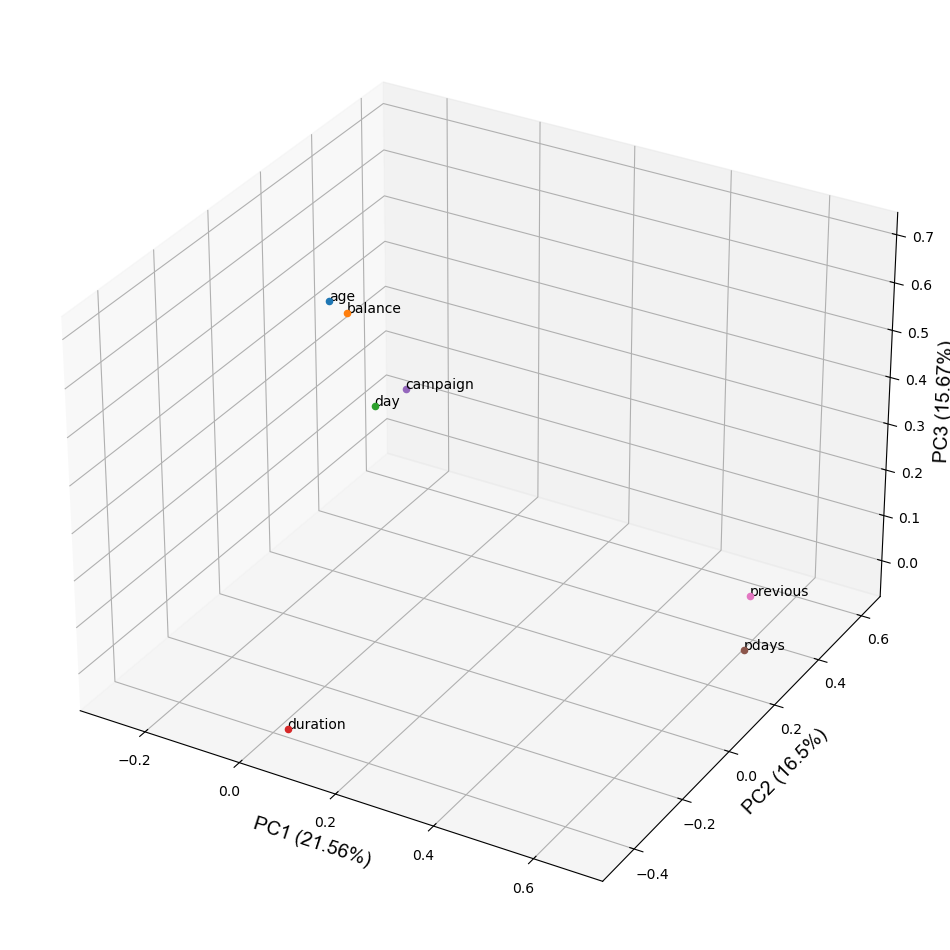

In [17]:

# 3D
# Gráfico de cargas en 3D de los componentes principales
cluster.pcaplot(
    x=cargas['Componente 1'],
    y=cargas['Componente 2'],
    z=cargas['Componente 3'],
    labels=columnas_numericas.columns.values,
    show=True, dim=(12,16), axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2),
    var3=round(pca2.explained_variance_ratio_[2]*100, 2)
)

Biplot del PCA

In [18]:

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=4, vmax=5)

Número de clusters: 2
Tipo de cargas_array: <class 'numpy.ndarray'>
Shape de cargas_array: (7, 7)


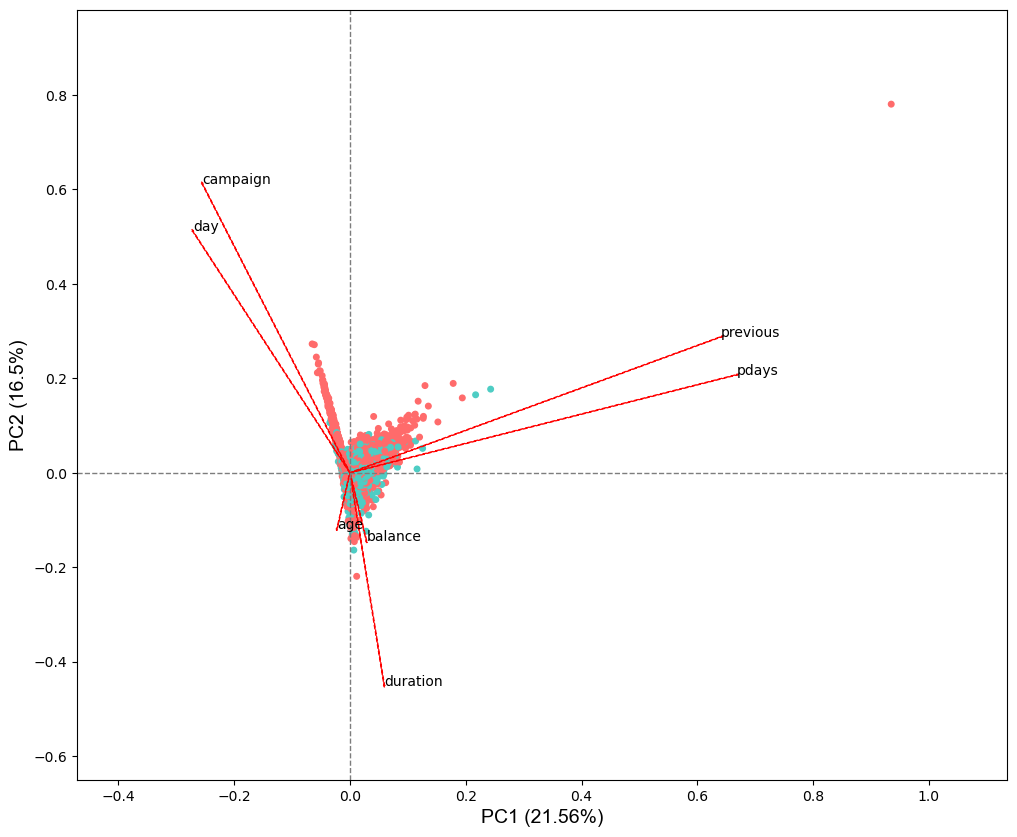

In [22]:
# Get PC scores
pca_scores = componentes_principales

# Verificar cuántos clusters tienes
# Convertir etiquetas 'yes'/'no' a valores numéricos
colors = df['y'].map(color_map).values
n_clusters = len(np.unique(colors))
print(f"Número de clusters: {n_clusters}")

# Definir paleta de colores
color_palette = {
    0: '#FF6B6B',  # Rojo coral
    1: '#4ECDC4',  # Turquesa
    2: '#45B7D1',  # Azul cielo
    3: '#FFA07A',  # Salmón
    4: '#98D8C8',  # Verde menta
    5: '#F7DC6F',  # Amarillo
    6: '#BB8FCE'   # Púrpura
}

# Convertir etiquetas a colores
colores_validos = [color_palette[int(c)] for c in colors]

# ⭐ CORRECCIÓN PRINCIPAL: Convertir DataFrame a NumPy array
if isinstance(cargas, pd.DataFrame):
    cargas_array = cargas.values.T  # Convertir a array y transponer
else:
    cargas_array = cargas.T  # Ya es array, solo transponer

print(f"Tipo de cargas_array: {type(cargas_array)}")
print(f"Shape de cargas_array: {cargas_array.shape}")

# Crear el biplot
cluster.biplot(
    cscore=pca_scores, 
    loadings=cargas_array,  # ← USAR EL ARRAY CONVERTIDO
    labels=columnas_numericas.columns.values, 
    dotsize=16,
    colordot=colores_validos,
    arrowcolor='red',
    arrowlinewidth=0.9, 
    arrowlinestyle='--', 
    show=True, 
    dim=(12, 10), 
    axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2)
)

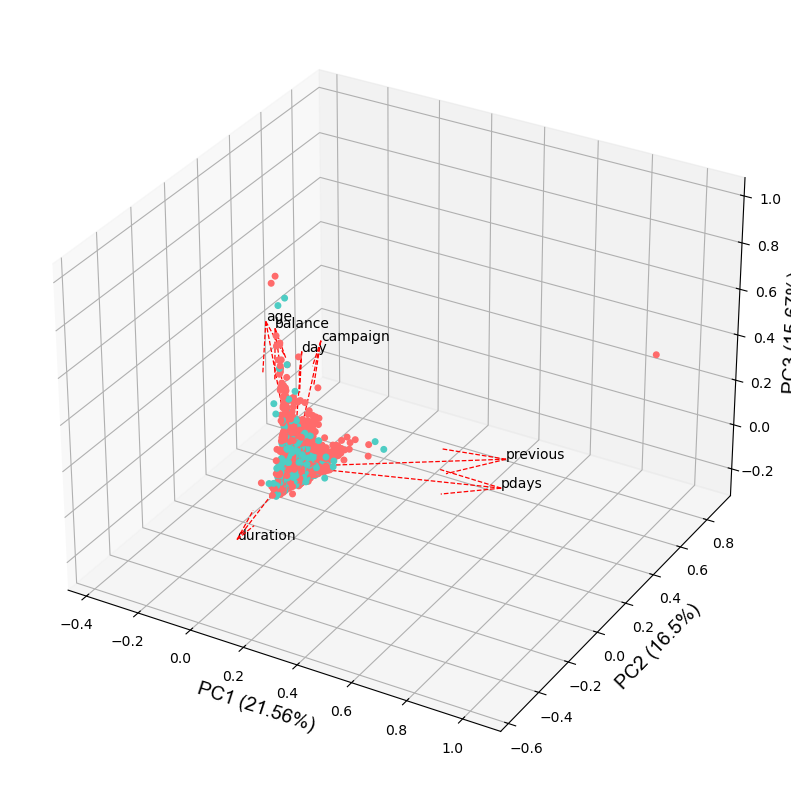

In [25]:
# get 3D biplot
# Usar colores_validos para asignar colores válidos a los puntos
cluster.biplot(
    cscore=pca_scores,
    loadings=cargas.values.T,
    labels=columnas_numericas.columns.values,
    dotsize=16,
    colordot=colores_validos,  # <- usar la lista de colores válidos
    arrowcolor='r',
    arrowlinewidth=0.9,
    arrowlinestyle='--',
    show=True,
    dim=(12,10),
    axlabelfontsize=14,
    var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2),
    var3=round(pca2.explained_variance_ratio_[2]*100, 2)
)